In [1140]:
import pandas as pd
import matplotlib.pyplot as plt

In [1141]:
data = pd.read_csv('data\\data_overview.csv')

In [1142]:
data.head()

,brand,model,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,metallic,country_origin,first_owner,accident_free,condition,price,currency
0,Abarth,595,2021.0,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,NaN,NaN,NaN,Używane,65000,PLN
1,Abarth,595,2018.0,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,Polska,NaN,Tak,Używane,82999,PLN
2,Abarth,595,2016.0,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,NaN,NaN,NaN,Używane,59900,PLN
3,Abarth,500,2023.0,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,Polska,NaN,Tak,Używane,135000,PLN
4,Abarth,595,2019.0,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,Włochy,NaN,Tak,Używane,79900,PLN


### brand - Brand of the vehicle

In [1143]:
# Count the number of missing values
data['brand'].isna().sum()

2

In [1144]:
# Remove rows with missing values
data = data.dropna(subset=['brand'])

In [1145]:
type_brand = data['brand'].dtype
print(type_brand)

object


In [1146]:
# Display unique values and their counts
unique_brand = data['brand'].value_counts()

unique_brand

brand
BMW           20888
Audi          20575
Ford          19018
Skoda         14266
Renault       13311
              ...  
Omoda             2
Brilliance        1
Jetour            1
Skywell           1
BYD               1
Name: count, Length: 103, dtype: int64

In [1147]:
# Identify brands with counts >= 100
brands_to_keep = unique_brand[unique_brand >= 100].index

# Filter the dataset to keep only these brands
data_filtered = data[data['brand'].isin(brands_to_keep)]

perform one-hot encoding

In [1148]:
# Perform one-hot encoding for the 'brand' column
data = pd.get_dummies(data, columns=['brand'], prefix='', prefix_sep='')

In [1149]:
data.head()

,model,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,595,2021.0,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
1,595,2018.0,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
2,595,2016.0,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
3,500,2023.0,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,...,False,False,False,False,False,False,False,False,False,False
4,595,2019.0,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,...,False,False,False,False,False,False,False,False,False,False


### model - Model of the vehicle

In [1150]:
type_brand = data['model'].dtype
print(type_brand)

object


In [1151]:
# Display unique values and their counts
unique_model = data['model'].value_counts()

unique_model

model
Octavia     4833
A4          4711
Seria 3     4361
Focus       4035
Seria 5     4000
            ... 
Klasa T        1
FJ             1
100 NX         1
Bluebird       1
405            1
Name: count, Length: 1259, dtype: int64

Model column has too much unique values, so we decided to remove this variable.

In [1152]:
# Remove the 'model' column
data = data.drop(columns=['model'])

### year_production - Year of production

In [1153]:
# Count the number of missing values
data['year_production'].isna().sum()

0

In [1154]:
type_year_production = data['year_production'].dtype
print(type_year_production)

float64


In [1155]:
# Convert 'year_production' to integer
data['year_production'] = data['year_production'].astype(int)

In [1156]:
# Display unique values and their counts
unique_year_production = data['year_production'].value_counts()

unique_year_production

year_production
2019    13739
2018    13565
2017    13092
2016    11921
2023    11671
        ...  
1937        1
1915        1
1900        1
1939        1
1935        1
Name: count, Length: 90, dtype: int64

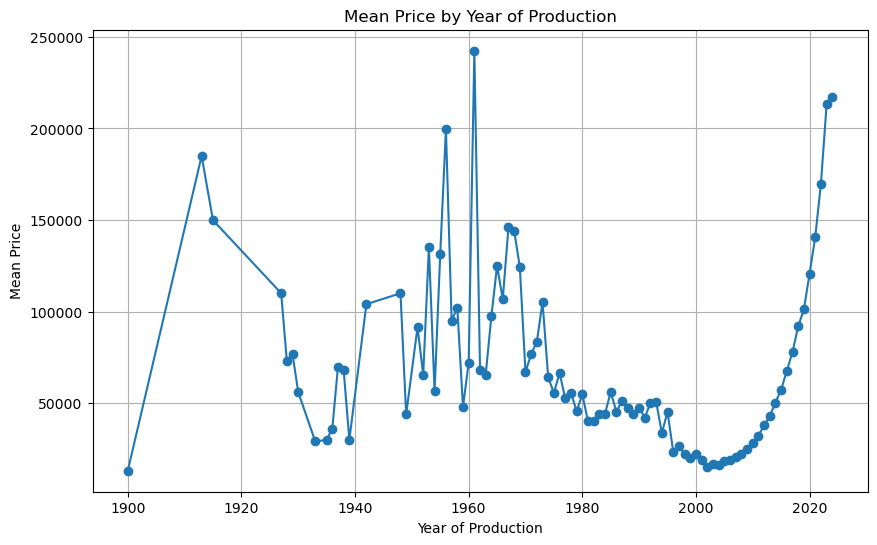

In [1157]:
# change data type as numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Group by 'year_production' and calculate the mean price for each year
mean_price_per_year = data.groupby('year_production')['price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(mean_price_per_year['year_production'], mean_price_per_year['price'], marker='o')
plt.title('Mean Price by Year of Production')
plt.xlabel('Year of Production')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In [1158]:
data.head()

,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,2021,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False
1,2018,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,...,False,False,False,False,False,False,False,False,False,False
2,2016,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,...,False,False,False,False,False,False,False,False,False,False
3,2023,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,...,False,False,False,False,False,False,False,False,False,False
4,2019,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False


### mileage

In [1159]:
# Count the number of missing values
data['mileage'].isna().sum()

41

In [1160]:
# Remove rows with missing values
data = data.dropna(subset=['mileage'])

In [1161]:
type_mileage = data['mileage'].dtype
print(type_mileage)

object


In [1162]:
# Remove ' km' from the strings and any spaces, then convert to integer
data['mileage'] = data['mileage'].str.replace(' km', '').str.replace(' ', '').astype(int)

# Check the result
print(data['mileage'].head())

0     15900
1     48000
2     54500
3      5578
4    116000
Name: mileage, dtype: int32


In [1163]:
# Display unique values and their counts
unique_mileage = data['mileage'].value_counts()

unique_mileage

mileage
1         5820
5         4684
10        2728
220000    1069
180000     994
          ... 
42592        1
360650       1
247729       1
139444       1
207949       1
Name: count, Length: 46830, dtype: int64

In [1164]:
# Remove extreme outliers for better visualization
data = data[(data['mileage'] < 800000)]

In [1165]:
# Summary statistics
mileage_stats = data['mileage'].describe()
print(mileage_stats)

count    200583.000000
mean     141372.894368
std       95387.725053
min           1.000000
25%       64000.000000
50%      141399.000000
75%      207000.000000
max      792761.000000
Name: mileage, dtype: float64


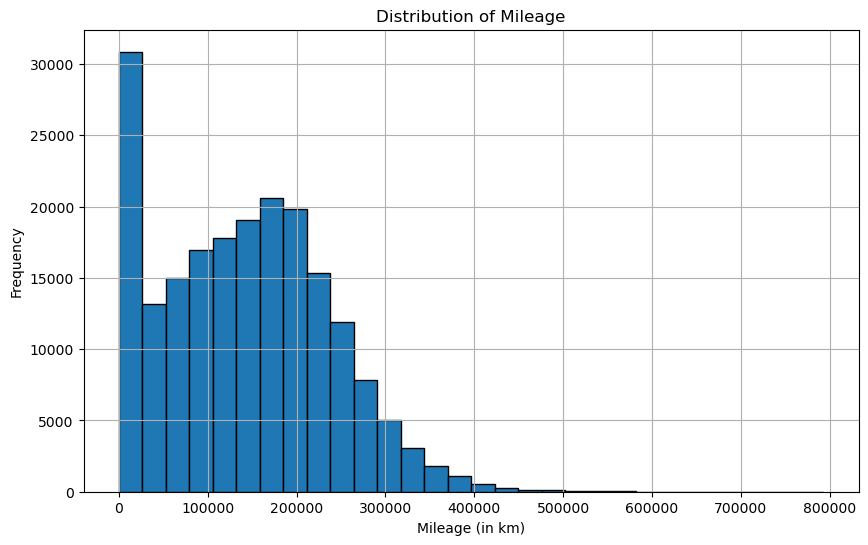

In [1166]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['mileage'], bins=30, edgecolor='black')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (in km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

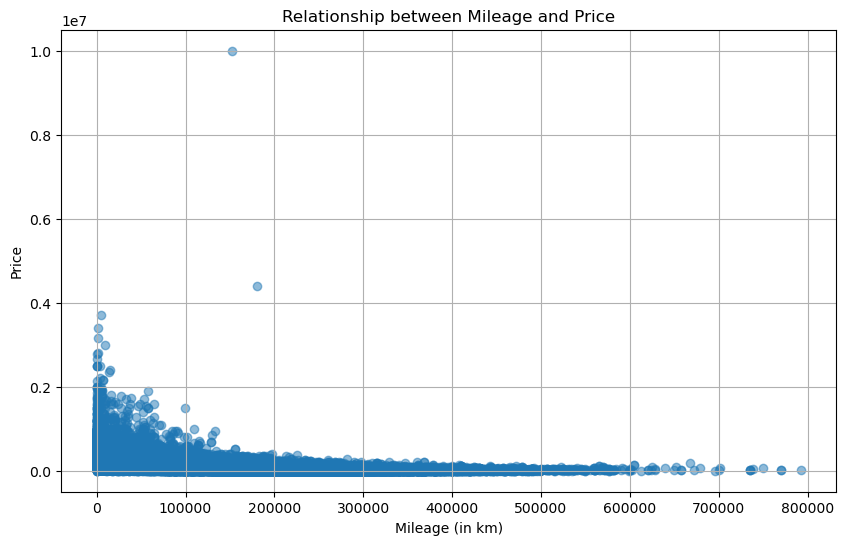

In [1167]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['mileage'], data['price'], alpha=0.5)
plt.title('Relationship between Mileage and Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1168]:
data.head()

,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,2021,15900,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False
1,2018,48000,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,...,False,False,False,False,False,False,False,False,False,False
2,2016,54500,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,...,False,False,False,False,False,False,False,False,False,False
3,2023,5578,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,...,False,False,False,False,False,False,False,False,False,False
4,2019,116000,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False


### engine_capacity	- Engine capacity

In [1169]:
# Count the number of missing values
data['engine_capacity'].isna().sum()

3881

In [1170]:
# Remove rows with missing values
data = data.dropna(subset=['engine_capacity'])

In [1171]:
type_engine_capacity = data['engine_capacity'].dtype
print(type_engine_capacity)

object


In [1172]:
# Remove ' km' from the strings and any spaces, then convert to integer
data['engine_capacity'] = data['engine_capacity'].str.replace(' cm3', '').str.replace(' ', '').astype(int)

# Check the result
print(data['engine_capacity'].head())

0    1368
1    1368
2    1368
3    1368
4    1368
Name: engine_capacity, dtype: int32


In [1173]:
# Summary statistics
engine_capacity_stats = data['engine_capacity'].describe()
print(engine_capacity_stats)

count    196702.000000
mean       1924.960677
std         808.742967
min         400.000000
25%        1497.000000
50%        1896.000000
75%        1997.000000
max        8400.000000
Name: engine_capacity, dtype: float64


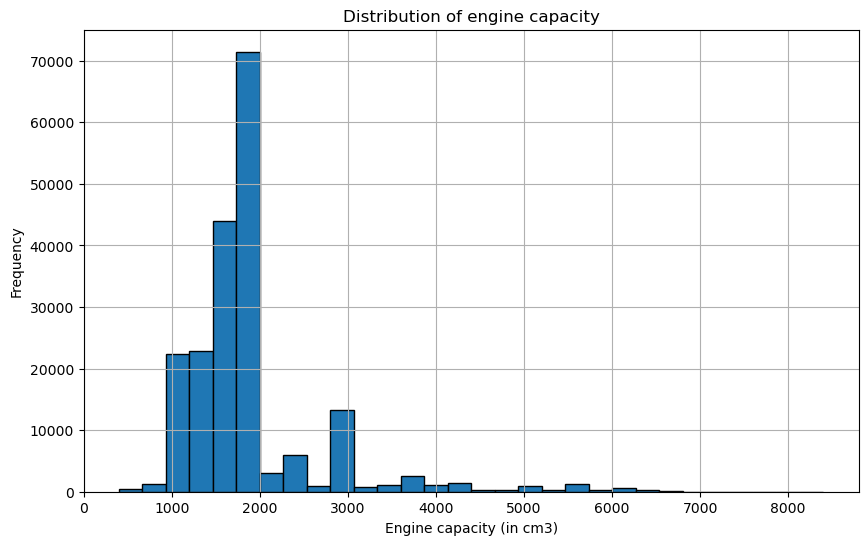

In [1174]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['engine_capacity'], bins=30, edgecolor='black')
plt.title('Distribution of engine capacity')
plt.xlabel('Engine capacity (in cm3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

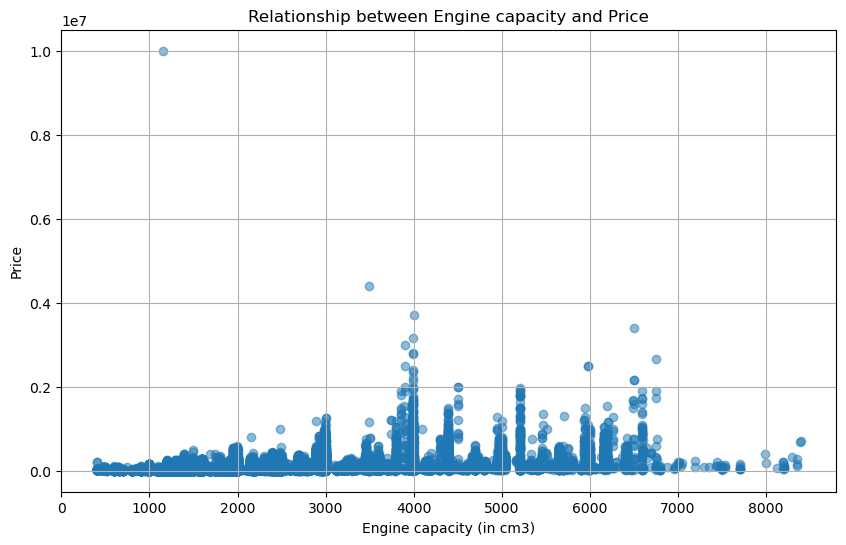

In [1175]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['engine_capacity'], data['price'], alpha=0.5)
plt.title('Relationship between Engine capacity and Price')
plt.xlabel('Engine capacity (in cm3)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1176]:
data.head()

,year_production,mileage,engine_capacity,fuel_type,power,gearbox,drive_type,body_type,doors,color,...,Triumph,Uaz,VELEX,Volkswagen,Volvo,Warszawa,Wartburg,Wołga,e.GO,Żuk
0,2021,15900,1368,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False
1,2018,48000,1368,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,...,False,False,False,False,False,False,False,False,False,False
2,2016,54500,1368,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,...,False,False,False,False,False,False,False,False,False,False
3,2023,5578,1368,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,...,False,False,False,False,False,False,False,False,False,False
4,2019,116000,1368,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,...,False,False,False,False,False,False,False,False,False,False


### fuel_type - Fuel type

In [1177]:
# Count the number of missing values
data['fuel_type'].isna().sum()

0

In [1178]:
type_fuel_type = data['fuel_type'].dtype
print(type_fuel_type)

object


In [1179]:
# Display unique values and their counts
unique_fuel_type = data['fuel_type'].value_counts()

unique_fuel_type

fuel_type
Benzyna            99105
Diesel             82904
Benzyna+LPG         8169
Hybryda             4777
Hybryda Plug-in     1700
Benzyna+CNG           46
Wodór                  1
Name: count, dtype: int64

In [1180]:
data = data[~data['fuel_type'].isin(['Benzyna+CNG', 'Wodór'])]

perform one-hot encoding

In [1181]:
# Perform one-hot encoding for the 'brand' column
data = pd.get_dummies(data, columns=['fuel_type'])

# Remove the 'fuel_type_' prefix from the column names
data.columns = data.columns.str.replace('fuel_type_', '')

In [1182]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,drive_type,body_type,doors,color,metallic,...,Warszawa,Wartburg,Wołga,e.GO,Żuk,Benzyna,Benzyna+LPG,Diesel,Hybryda,Hybryda Plug-in
0,2021,15900,1368,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False
1,2018,48000,1368,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,...,False,False,False,False,False,True,False,False,False,False
2,2016,54500,1368,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,...,False,False,False,False,False,True,False,False,False,False
3,2023,5578,1368,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,...,False,False,False,False,False,True,False,False,False,False
4,2019,116000,1368,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False


### power

In [1183]:
# Count the number of missing values
data['power'].isna().sum()

67

In [1184]:
# Remove rows with missing values
data = data.dropna(subset=['power'])

In [1185]:
type_power = data['power'].dtype
print(type_power)

object


In [1186]:
# Remove ' km' from the strings and any spaces, then convert to integer
data['power'] = data['power'].str.replace(' KM', '').str.replace(' ', '').astype(int)

# Check the result
print(data['power'].head())

0    165
1    145
2    145
3    165
4    165
Name: power, dtype: int32


In [1187]:
# Display unique values and their counts
unique_power = data['power'].value_counts()

unique_power

power
150     17594
140      8169
190      8101
130      7061
110      6744
        ...  
2498        1
617         1
523         1
3           1
567         1
Name: count, Length: 568, dtype: int64

In [1188]:
# Summary statistics 
power_stats = data['power'].describe()
print(power_stats)

count    196588.000000
mean        166.439142
std          89.354123
min           1.000000
25%         113.000000
50%         149.000000
75%         190.000000
max        9999.000000
Name: power, dtype: float64


In [1189]:
# Remove extreme outliers for better visualization
data = data[(data['power'] < 1501) & (data['power'] > 4)]

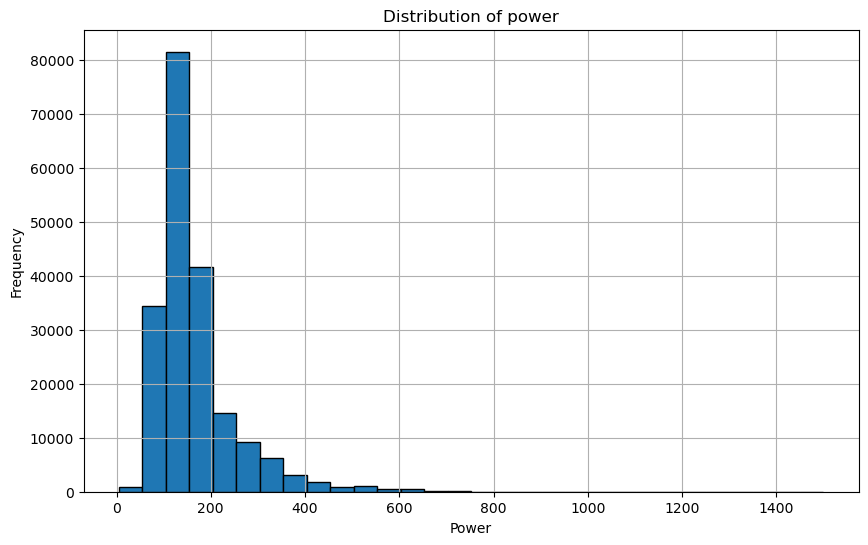

In [1190]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['power'], bins=30, edgecolor='black')
plt.title('Distribution of power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

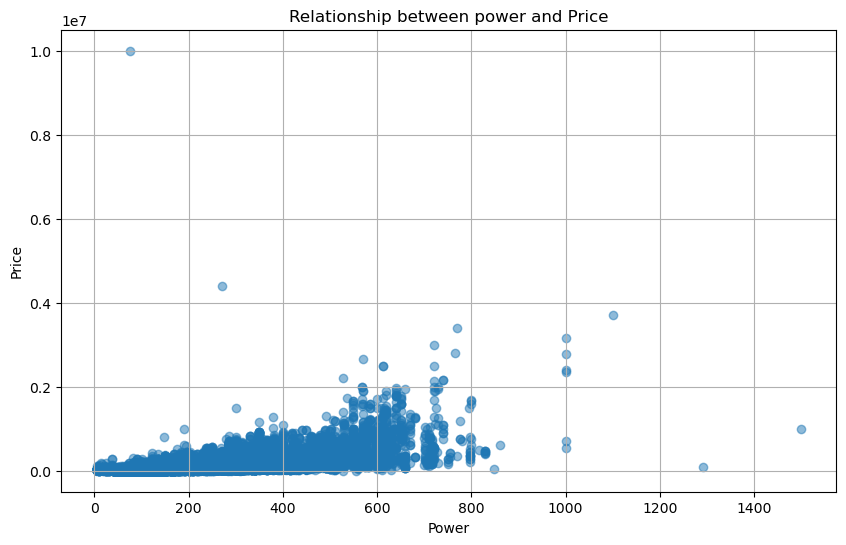

In [1191]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['power'], data['price'], alpha=0.5)
plt.title('Relationship between power and Price')
plt.xlabel('Power')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [1192]:
data.head()

,year_production,mileage,engine_capacity,power,gearbox,drive_type,body_type,doors,color,metallic,...,Warszawa,Wartburg,Wołga,e.GO,Żuk,Benzyna,Benzyna+LPG,Diesel,Hybryda,Hybryda Plug-in
0,2021,15900,1368,165,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False
1,2018,48000,1368,145,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,...,False,False,False,False,False,True,False,False,False,False
2,2016,54500,1368,145,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,...,False,False,False,False,False,True,False,False,False,False
3,2023,5578,1368,165,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,...,False,False,False,False,False,True,False,False,False,False
4,2019,116000,1368,165,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,...,False,False,False,False,False,True,False,False,False,False


### gearbox

### drive_type - Drive type

### body_type - Body type

### doors - Number of doors

### color	

### metallic - Metallic paint

### country_origin - Country of origin

### first_owner	- First owner

### accident_free - Accident-free vehicle

### condition	

### price	

### currency

In [10]:
# Display unique values and their counts
unique_values_counts = data['brand'].value_counts()

print(unique_values_counts)

Kierownica po prawej (Anglik)
Tak    340
Name: count, dtype: int64


In [ ]:
# Count the number of missing values
missing_brand_count = data['Brand of the vehicle'].isna().sum()

Remove all rows where 'Kierownica po prawej (Anglik)' is 'tak', because the price of cars with the steering wheel on the right is significantly different from their equivalent with the steering wheel on the left

In [11]:
# Remove all rows where 'Kierownica po prawej (Anglik)' is 'tak'
data = data[data['Kierownica po prawej (Anglik)'] != 'Tak']

In [12]:
# Retain only specific columns which are relevant for this project
columns_to_keep = [
    'Marka pojazdu', 'Model pojazdu', 'Rok produkcji', 'Przebieg', 'Pojemność skokowa', 'Rodzaj paliwa', 
    'Moc', 'Skrzynia biegów', 'Napęd', 'Typ nadwozia', 'Liczba drzwi', 'Kolor', 'Metalik', 
    'Kraj pochodzenia', 'Pierwszy właściciel', 'Bezwypadkowy', 'Stan', 'Cena', 'Waluta'
]

# Select only the specified columns
data = data[columns_to_keep]
data.head()

,Marka pojazdu,Model pojazdu,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Typ nadwozia,Liczba drzwi,Kolor,Metalik,Kraj pochodzenia,Pierwszy właściciel,Bezwypadkowy,Stan,Cena,Waluta
0,Abarth,595,2021.0,15 900 km,1 368 cm3,Benzyna,165 KM,Manualna,NaN,Auta małe,3.0,Niebieski,NaN,NaN,NaN,NaN,Używane,65000,PLN
1,Abarth,595,2018.0,48 000 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Biały,NaN,Polska,NaN,Tak,Używane,82999,PLN
2,Abarth,595,2016.0,54 500 km,1 368 cm3,Benzyna,145 KM,Manualna,Na przednie koła,Auta małe,3.0,Czerwony,NaN,NaN,NaN,NaN,Używane,59900,PLN
3,Abarth,500,2023.0,5 578 km,1 368 cm3,Benzyna,165 KM,Automatyczna,Na przednie koła,Auta małe,3.0,Szary,NaN,Polska,NaN,Tak,Używane,135000,PLN
4,Abarth,595,2019.0,116 000 km,1 368 cm3,Benzyna,165 KM,Manualna,Na przednie koła,Kompakt,3.0,Niebieski,NaN,Włochy,NaN,Tak,Używane,79900,PLN


Write the cleaned data frame to a new CSV file

In [13]:
data.to_csv('data\\data_overview.csv', index=False) 